In [8]:
import numpy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

churn_df = pd.read_csv('data/telecom_churn_clean.csv')
X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)
X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])

prediction = knn.predict(X_new)
print('Predictions: {}'.format(prediction))

Predictions: [1 0 0]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8733133433283359


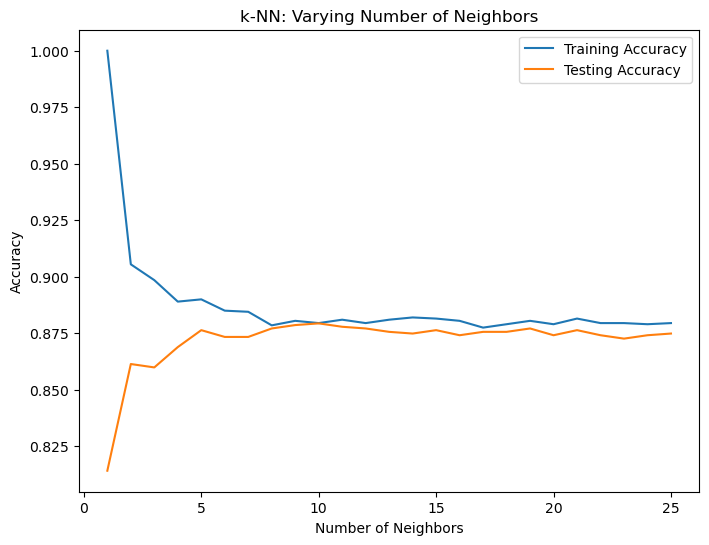

In [13]:
## 通过批量计算来评估拟合
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies[k] = knn.score(X_train, y_train)
    test_accuracies[k] = knn.score(X_test, y_test)
plt.figure(figsize=(8, 6))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, list(train_accuracies.values()), label='Training Accuracy')
plt.plot(neighbors, list(test_accuracies.values()), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prediction))
print("=============================")
print("Classification Report:")
print(classification_report(y_test, y_prediction))

Confusion Matrix:
[[1125   13]
 [ 148   48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1138
           1       0.79      0.24      0.37       196

    accuracy                           0.88      1334
   macro avg       0.84      0.62      0.65      1334
weighted avg       0.87      0.88      0.85      1334

